<a href="https://colab.research.google.com/github/JLearning5/Credit-Card-Fraud-Detection-project/blob/main/notebooks/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install gdown to download files from Google Drive
!pip install gdown

# Download the dataset from Google Drive using the file ID
import gdown

file_id = '1cIYhJzufKd1R9t3qQtwYnLbjvwzybqq4'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

# Load the dataset
import pandas as pd

df = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1cIYhJzufKd1R9t3qQtwYnLbjvwzybqq4
From (redirected): https://drive.google.com/uc?id=1cIYhJzufKd1R9t3qQtwYnLbjvwzybqq4&confirm=t&uuid=d7c1452d-0737-41c5-9a04-1536aa33b550
To: /content/dataset.csv
100%|██████████| 151M/151M [00:02<00:00, 69.0MB/s]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv(r'/content/dataset.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [12]:
# Under-sampling
# Build a sample dataset containing similar distribution of normal and fraudulent transactions

legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
217619,140965.0,-1.104465,0.616952,-0.878973,-0.312839,-0.092112,-0.020623,1.422463,0.442278,-0.406603,...,0.265005,0.438796,0.413781,0.649776,-0.082746,0.520578,0.151103,0.216899,270.00,0
110797,71979.0,1.219489,0.570312,-0.472641,0.811092,0.018849,-1.263838,0.273611,-0.151885,-0.354864,...,-0.095356,-0.282286,-0.063827,0.408190,0.494244,0.340720,-0.037946,0.033545,0.76,0
253713,156376.0,-0.521058,0.831371,-0.662883,-1.174612,-0.279909,-0.629210,-0.107415,0.607334,-1.500623,...,-0.503277,-1.214900,0.157754,-0.766063,-0.504957,-0.019416,-0.330529,-0.102426,11.13,0
270306,164013.0,2.169427,-1.348144,-3.443798,-3.771384,1.833297,2.520830,-0.565751,0.507231,0.620532,...,-0.217382,-0.081286,0.051091,0.704830,0.383716,-0.683252,0.047461,-0.056894,49.99,0
19790,30560.0,1.451590,-1.247803,0.452105,-1.662949,-1.234481,0.452841,-1.457553,0.210372,-1.759282,...,-0.032970,0.287209,-0.090999,-0.823954,0.334235,-0.039647,0.059796,0.006333,22.00,0


In [13]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [14]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [15]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94686.682927,0.025984,0.043176,-0.048970,-0.019086,-0.061129,-0.047964,-0.009446,0.009015,0.089685,...,-0.003636,0.049731,-0.028279,0.007449,0.012186,0.009456,0.003892,-0.004733,0.012450,89.770305
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into features and targets

In [16]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
217619  140965.0 -1.104465  0.616952 -0.878973 -0.312839 -0.092112 -0.020623   
110797   71979.0  1.219489  0.570312 -0.472641  0.811092  0.018849 -1.263838   
253713  156376.0 -0.521058  0.831371 -0.662883 -1.174612 -0.279909 -0.629210   
270306  164013.0  2.169427 -1.348144 -3.443798 -3.771384  1.833297  2.520830   
19790    30560.0  1.451590 -1.247803  0.452105 -1.662949 -1.234481  0.452841   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [17]:
print(Y)

217619    0
110797    0
253713    0
270306    0
19790     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [19]:
model = LogisticRegression()

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a LogisticRegression instance with increased max_iter and scaling
model = LogisticRegression(max_iter=1000)

# Fit the model on the scaled data
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [20]:
# Assuming X_train, X_test, Y_train, Y_test are already defined as Pandas DataFrames
# Convert the scaled data back to DataFrame to retain feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Fit the model on the scaled data with feature names
model.fit(X_train_scaled_df, Y_train)

# Accuracy on training data
X_train_prediction = model.predict(X_train_scaled_df)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(f"Training data accuracy: {training_data_accuracy}")

# Accuracy on test data
X_test_prediction = model.predict(X_test_scaled_df)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(f"Test data accuracy: {test_data_accuracy}")

print("\n\nClassification Report:")
print(classification_report(Y_test, X_test_prediction))

Training data accuracy: 0.9606099110546379
Test data accuracy: 0.9441624365482234


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        99
           1       0.99      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



In [21]:
# Generate the classification report as a dictionary
report_dict = classification_report(Y_test, X_test_prediction, output_dict=True)

# Extract and format the accuracy value to 11 decimal places
accuracy = report_dict['accuracy']
formatted_accuracy = f"{accuracy:.17f}"

# Print the classification report with formatted accuracy
print("Classification Report:")
for label, metrics in report_dict.items():
    if label == 'accuracy':
        print(f"{label}: {formatted_accuracy}")

Classification Report:
accuracy: 0.94416243654822340


Class Distribution

Visualising the count of each class using Bar Plot

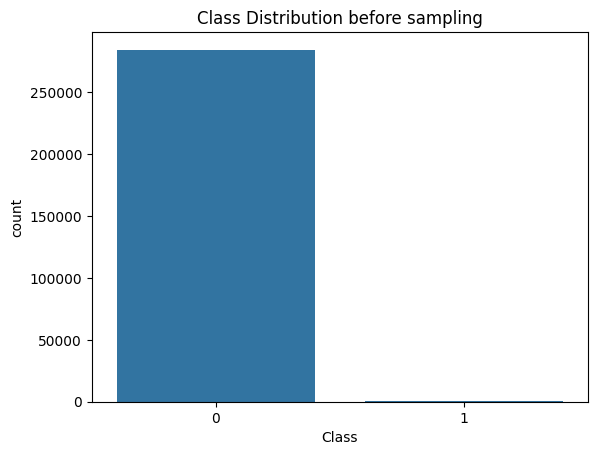

In [22]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution before sampling')
plt.show()

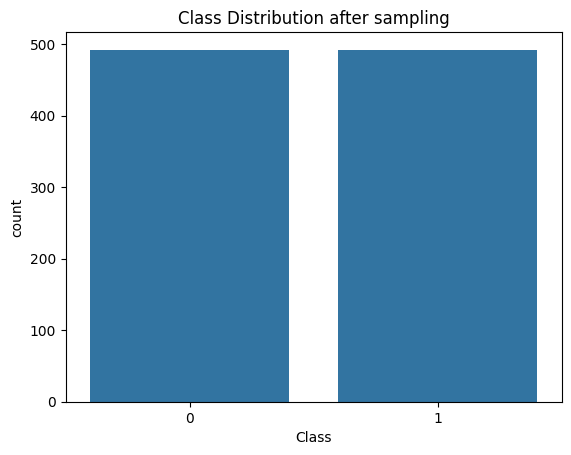

In [23]:
sns.countplot(x='Class', data=new_dataset)
plt.title('Class Distribution after sampling')
plt.show()

 Amount Distribution

Visualising the transaction amounts using histogram and box plot

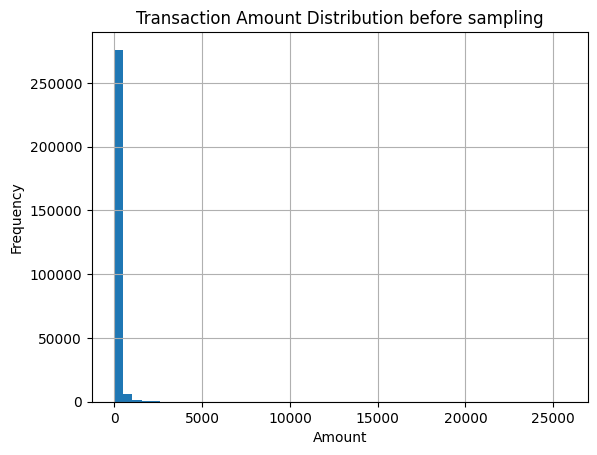

In [24]:
df['Amount'].hist(bins=50)
plt.title('Transaction Amount Distribution before sampling')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

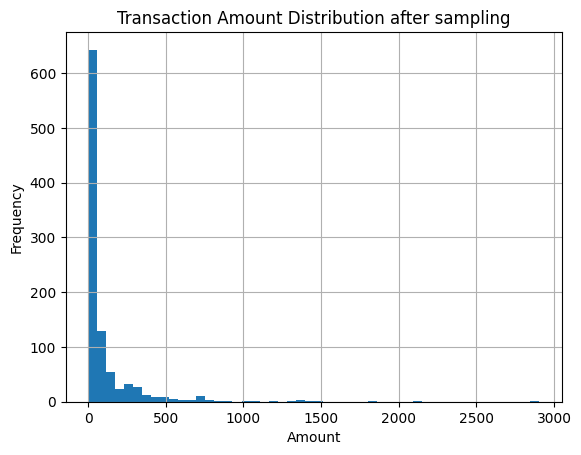

In [25]:
new_dataset['Amount'].hist(bins=50)
plt.title('Transaction Amount Distribution after sampling')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

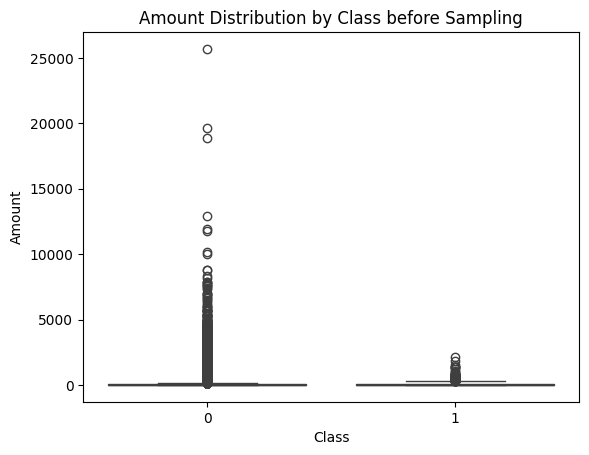

In [26]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount Distribution by Class before Sampling')
plt.show()

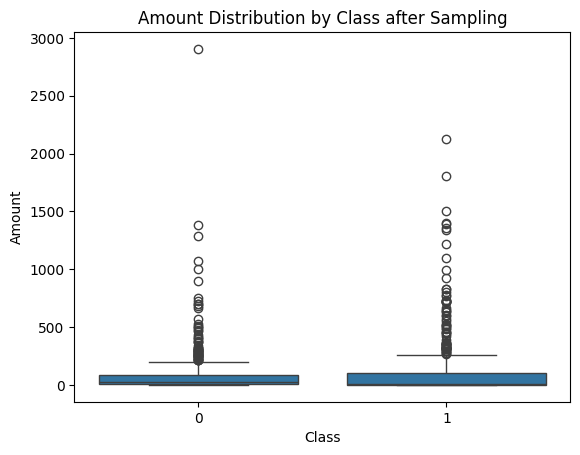

In [27]:
sns.boxplot(x='Class', y='Amount', data=new_dataset)
plt.title('Amount Distribution by Class after Sampling')
plt.show()

Time Distribution

Visualising the time of transactions using histogram and box plot

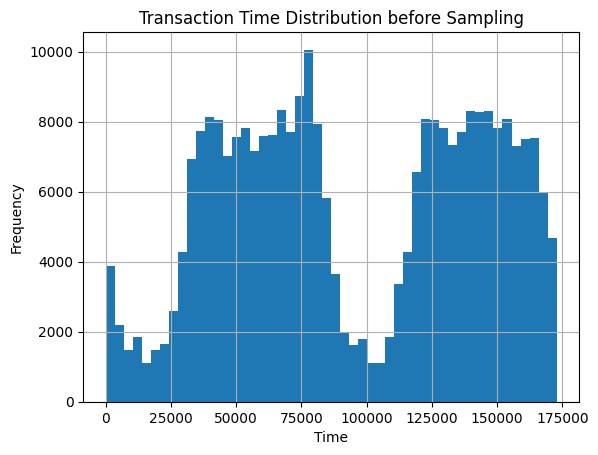

In [28]:
df['Time'].hist(bins=50)
plt.title('Transaction Time Distribution before Sampling')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

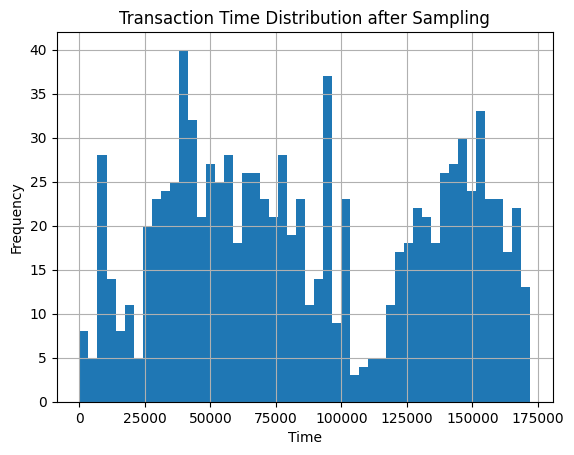

In [29]:
new_dataset['Time'].hist(bins=50)
plt.title('Transaction Time Distribution after Sampling')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

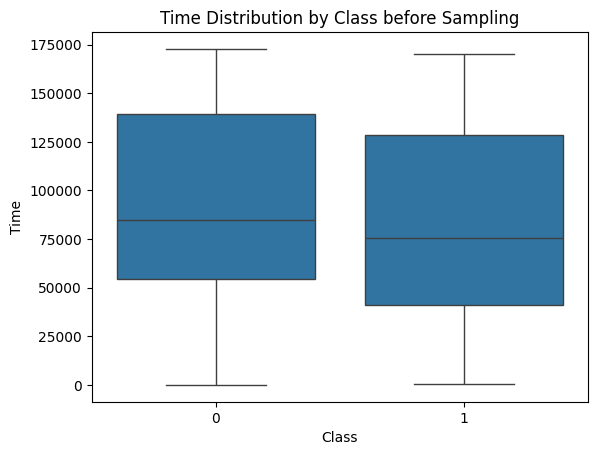

In [30]:
sns.boxplot(x='Class', y='Time', data=df)
plt.title('Time Distribution by Class before Sampling')
plt.show()

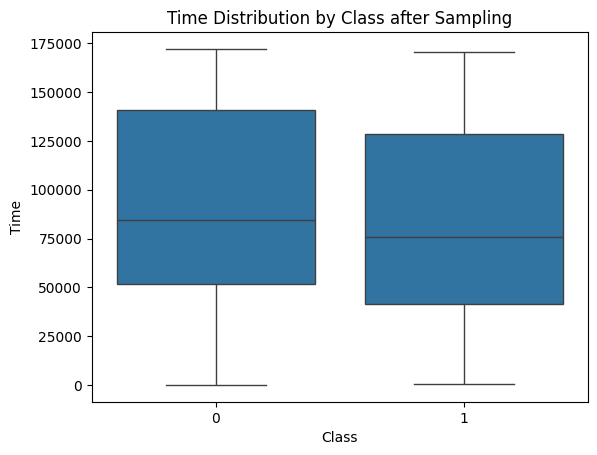

In [31]:
sns.boxplot(x='Class', y='Time', data=new_dataset)
plt.title('Time Distribution by Class after Sampling')
plt.show()

Correlation Matrix

Visualising the correlation matrix using Heatmap

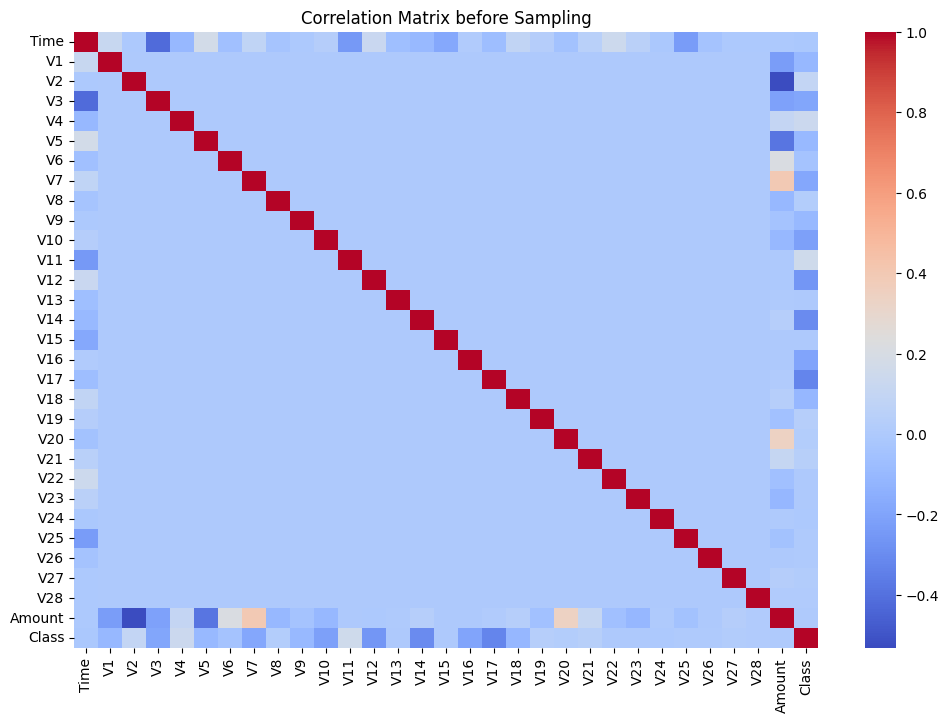

In [32]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix before Sampling')
plt.show()

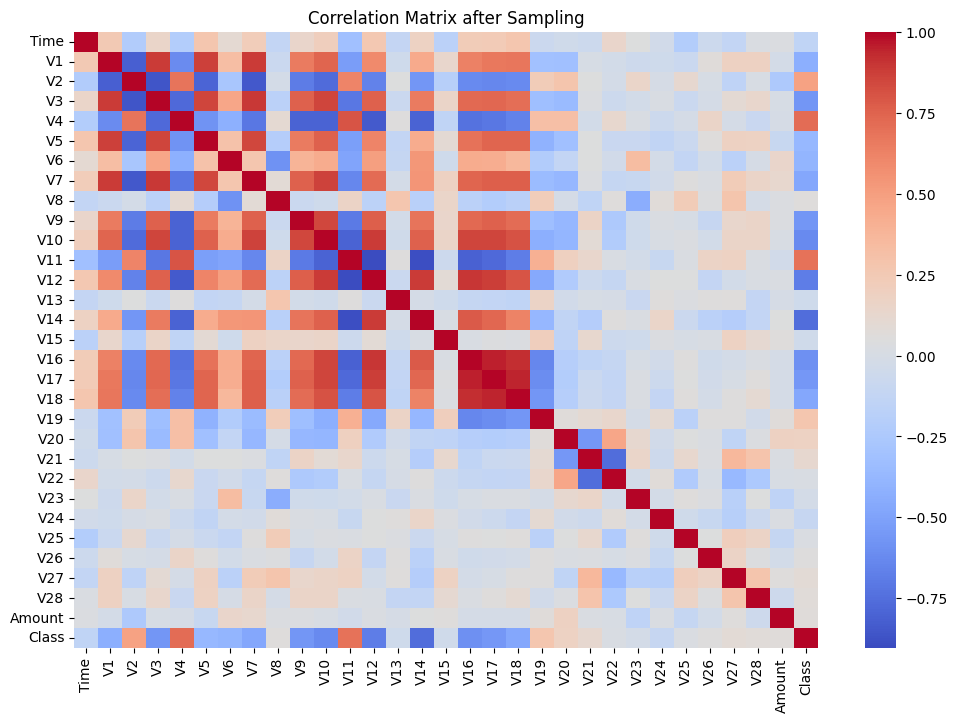

In [33]:
corr_matrix = new_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix after Sampling')
plt.show()

Pairplot

Visualising the relationships between pairs of features using Pairplot

Before Sampling

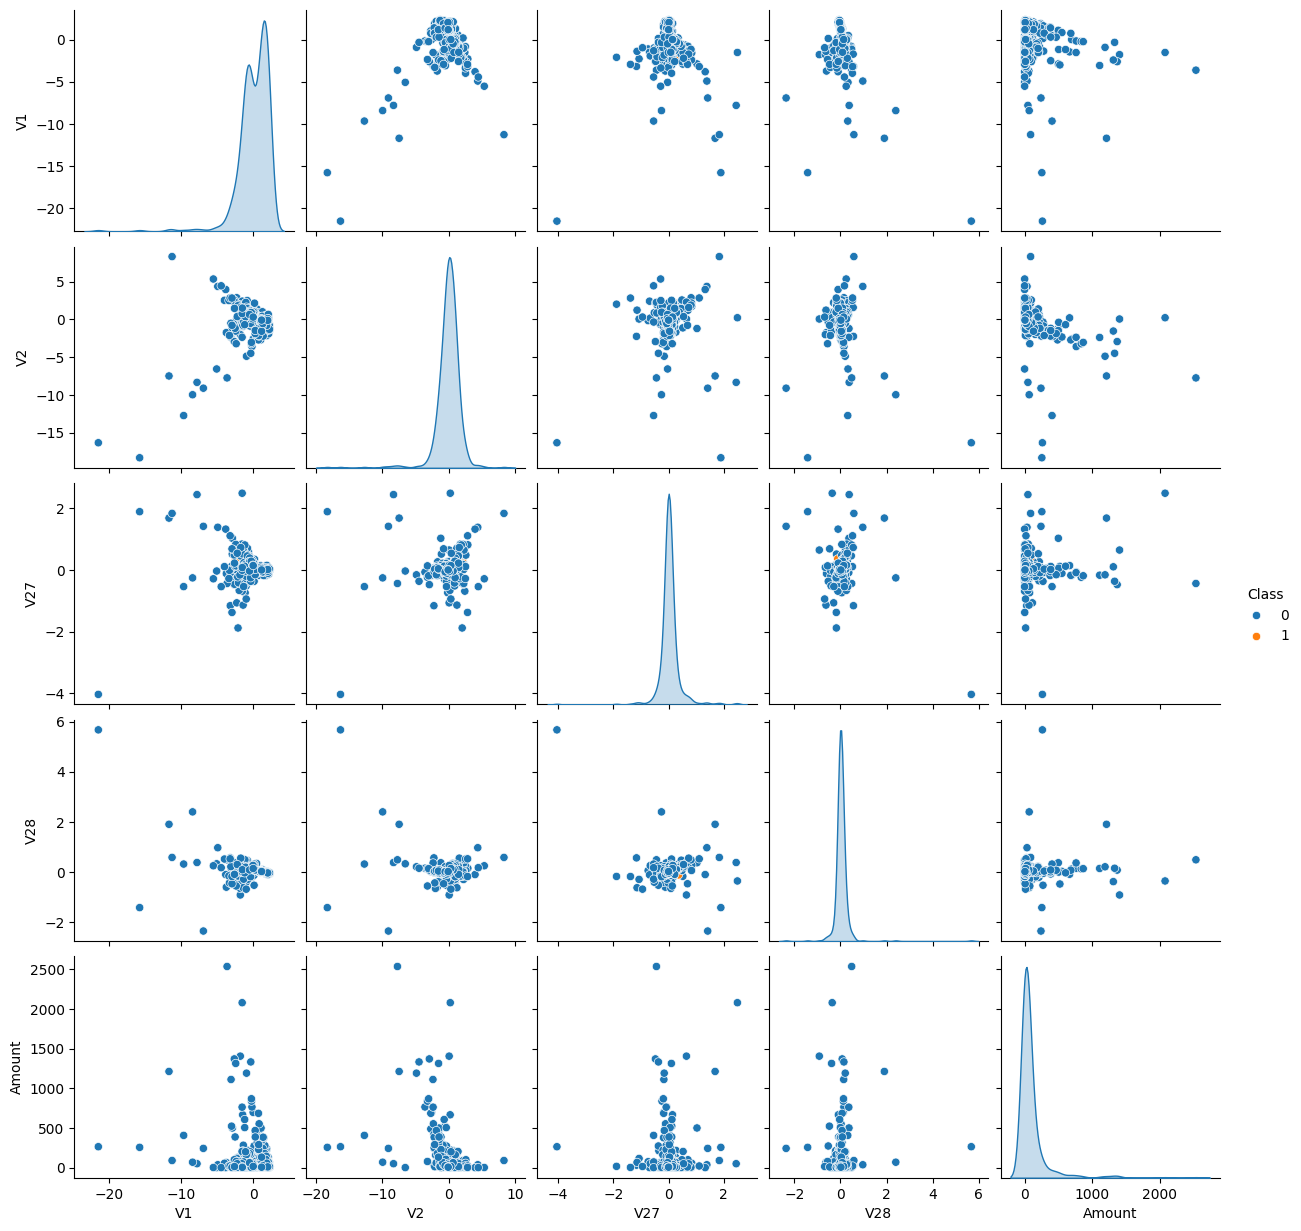

In [34]:
sample_df= df.sample(n=492)  # Sample a subset to make the plot more readable
sns.pairplot(sample_df, hue='Class', vars=['V1', 'V2', 'V27', 'V28', 'Amount'])
plt.show()

After Sampling

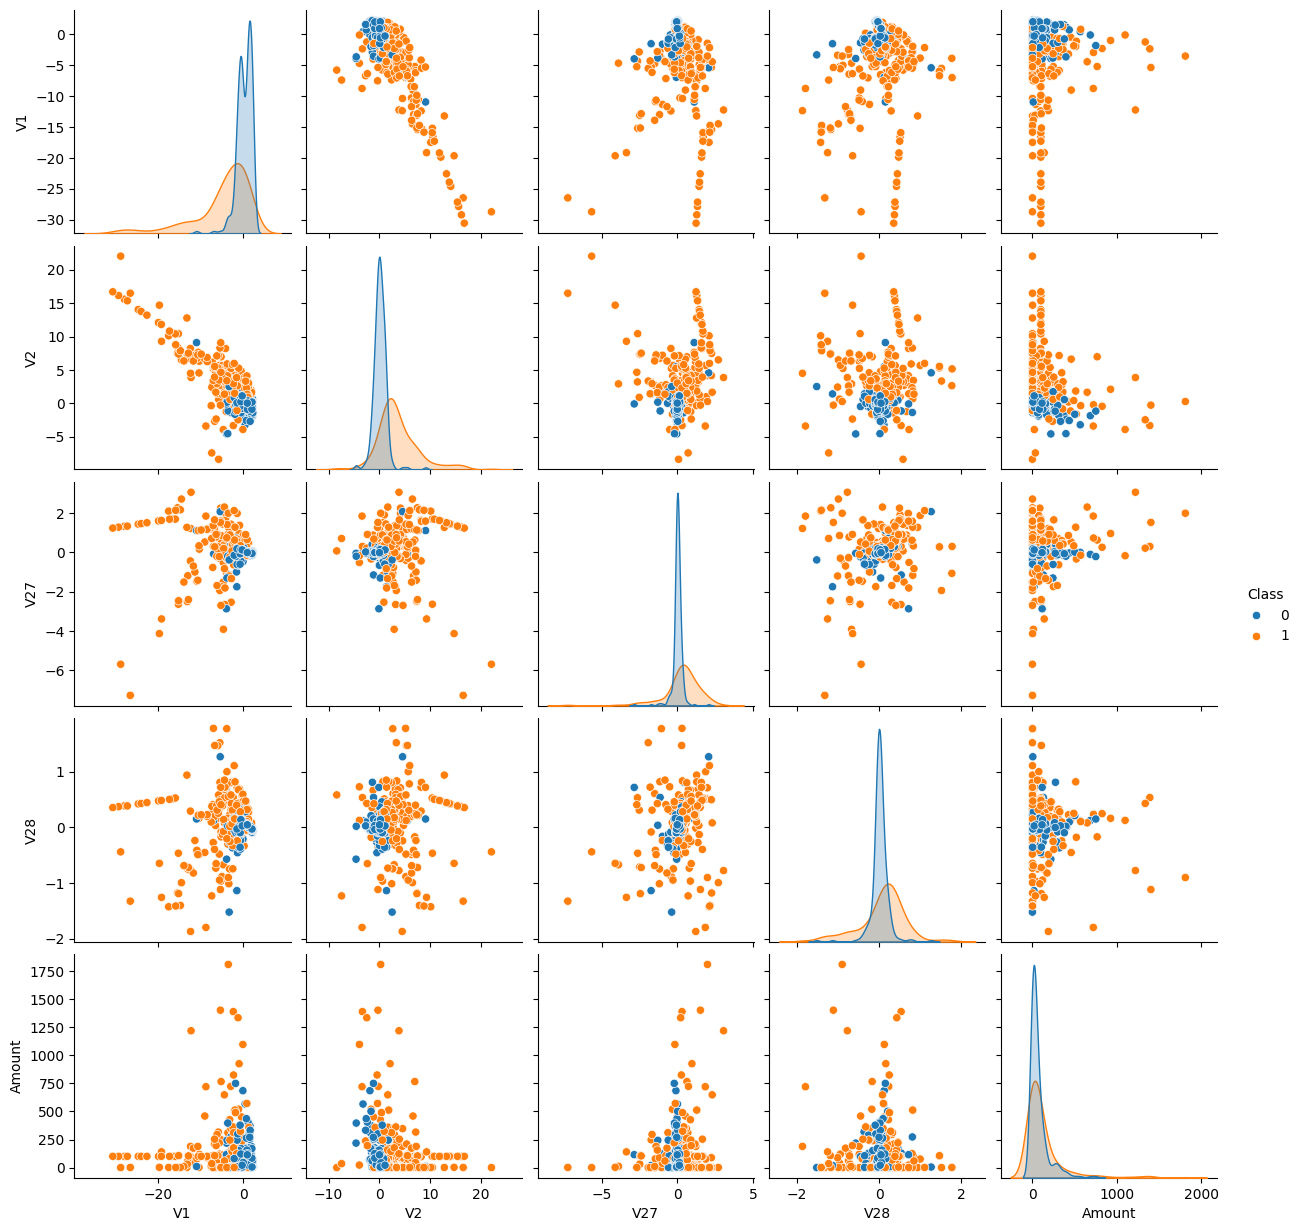

In [35]:
sample_new_dataset= new_dataset.sample(n=492)  # Sample a subset to make the plot more readable
sns.pairplot(sample_new_dataset, hue='Class', vars=['V1', 'V2', 'V27', 'V28', 'Amount'])
plt.show()

ROC Curve

Visualising the true positive rate against the false positive rate.

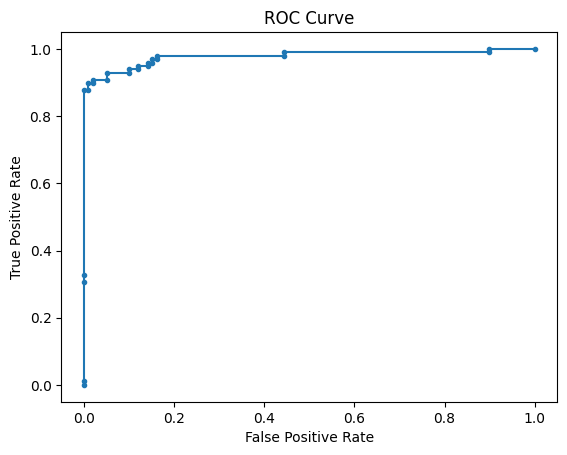

In [36]:
Y_pred_proba = model.predict_proba(X_test_scaled_df)[:,1]
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Precision-Recall Curve

Visualising precision vs. recall for different thresholds.

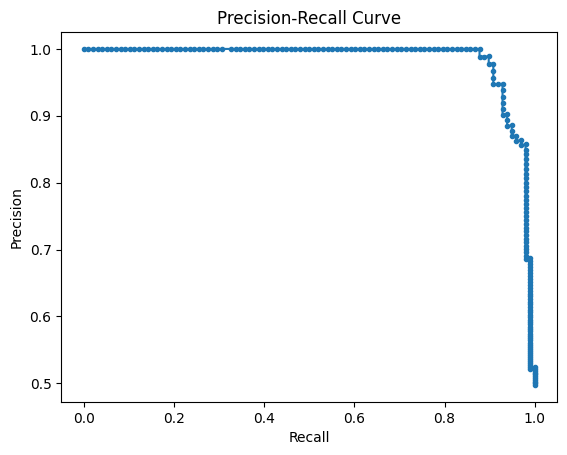

In [37]:
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Confusion Matrix

Visualising the performance of the classification model by showing the true positive, true negative, false positive, and false negative counts.

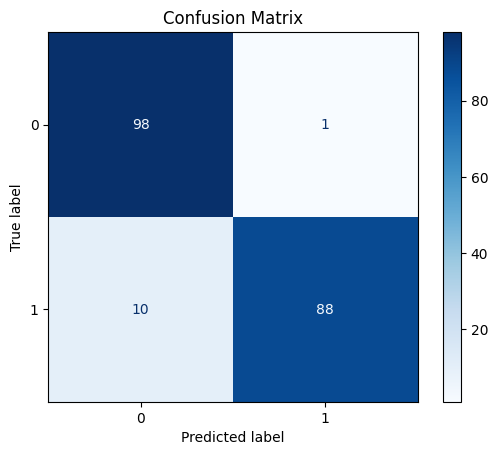

In [38]:
cm = confusion_matrix(Y_test, X_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Suppress specific sklearn warnings and replace them with custom messages
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

try:
    # Predict on a new transaction (example features)
    new_transaction = np.array([4,0.507333394,0.478048468,0.105139135,-0.264563389,0.528658946,-1.22970537,1.418076739,1.556907918,-0.879188755,0.044961551,0.721562547,0.155782591,-1.387034597,-1.163487022,-1.046408514,-0.24673884,-0.605133764,0.057097128,-0.24959798,-0.378035354,-0.875723674,-0.172384197,0.476539789,0.164738748,-1.073890765,-0.412927344,-0.558693454,1.434215211,849.16])

    # Reshape and scale the new transaction
    new_transaction = new_transaction.reshape(1, -1)
    new_transaction_scaled = scaler.transform(new_transaction)

    # Predict the class of the new transaction
    new_prediction = model.predict(new_transaction_scaled)
    print(f"Detection for the transaction: {'Fraudulent' if new_prediction[0] == 1 else 'Legitimate'}")

except Warning as w:
    if "does not have valid feature names" in str(w):
        print("")
    else:
        print(f"")

except ValueError as v:
    if "does not have valid feature names" in str(v):
        print("Custom Message: Invalid input! The number of features should be 30")
    else:
        print(f"Invalid input! The number of features should be 30\n{str(v)}")

except NameError as n:
    if "does not have valid feature names" in str(n):
        print("Invalid input! The input data does not have valid features.")
    else:
        print(f"Invalid input! The input data does not have valid features.\n{str(n)}")

Detection for the transaction: Fraudulent
